# Predicting personal financial distress

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

credit = pd.read_csv("cleaned.csv")
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingMonthlyIncome,MissingNumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,1,1
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,1,1
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,1,1
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,1,1
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,1,1
5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0,1,1
6,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.0,0,1
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0,1,1
8,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.0,0,0
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0,1,1


In [2]:
# Perform log transformation on MonthlyIncome
credit["MonthlyIncome"] = credit["MonthlyIncome"] + 1
credit["MonthlyIncome"] = np.log(credit["MonthlyIncome"])
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingMonthlyIncome,MissingNumberOfDependents
0,1,0.766127,45,2,0.802982,9.118335,13,0,6,0,2.0,1,1
1,0,0.957151,40,0,0.121876,7.863651,4,0,0,0,1.0,1,1
2,0,0.658180,38,1,0.085113,8.020599,2,1,0,0,0.0,1,1
3,0,0.233810,30,0,0.036050,8.101981,5,0,0,0,0.0,1,1
4,0,0.907239,49,1,0.024926,11.060196,7,0,1,0,0.0,1,1
5,0,0.213179,74,0,0.375607,8.160804,3,0,1,0,1.0,1,1
6,0,0.305682,57,0,5710.000000,8.805558,8,0,3,0,0.0,0,1
7,0,0.754464,39,0,0.209940,8.160804,8,0,0,0,0.0,1,1
8,0,0.116951,27,0,46.000000,8.805558,2,0,0,0,0.0,0,0
9,0,0.189169,57,0,0.606291,10.072597,9,0,4,0,2.0,1,1


### Prepare train and test set

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

X_train = train_set.drop('SeriousDlqin2yrs', axis=1)
Y_train = train_set['SeriousDlqin2yrs']

X_test = test_set.drop('SeriousDlqin2yrs', axis=1)
Y_test = test_set['SeriousDlqin2yrs']

X = credit.drop('SeriousDlqin2yrs', axis=1)
Y = credit['SeriousDlqin2yrs']

### K-Nearest Neighbors (KNN) Model 

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the train set
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

To evaluate our KNN classifier, we compute the accuracy score, the confusion matrix, and perform a cross validation with 10 folds.

In [5]:
# Predict the train set 
Y_train_pred = knn.predict(X_train)

# Compute accuracy score
from sklearn import metrics
metrics.accuracy_score(Y_train, Y_train_pred)

0.9415411795098293

In [6]:
# Construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_train_pred)

array([[111420,    512],
       [  6503,   1564]])

In [7]:
pd.crosstab(Y_train, Y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111420,512,111932
1,6503,1564,8067
All,117923,2076,119999


In [8]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_train_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97    111932
          1       0.75      0.19      0.31      8067

avg / total       0.93      0.94      0.93    119999



In [9]:
# Perform cross validation and compute accuracy score
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X, Y, cv=5)

array([0.93326889, 0.93216667, 0.93326667, 0.93386446, 0.93343111])

In [10]:
from sklearn.model_selection import cross_val_predict
Y_train_cv_pred = cross_val_predict(knn, X_train, Y_train, cv=5)

In [11]:
confusion_matrix(Y_train, Y_train_cv_pred)

array([[111052,    880],
       [  7138,    929]])

In [12]:
pd.crosstab(Y_train, Y_train_cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111052,880,111932
1,7138,929,8067
All,118190,1809,119999


In [13]:
print(classification_report(Y_train,Y_train_cv_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97    111932
          1       0.51      0.12      0.19      8067

avg / total       0.91      0.93      0.91    119999



In [26]:
# Compute false positive rate, true positive rate, and thresholds
from sklearn.metrics import roc_curve
Y_pred_proba = knn.predict_proba(X_train)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, Y_pred_proba)

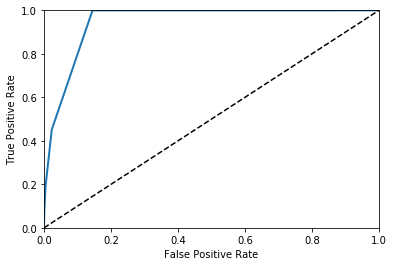

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

In [28]:
# Compute area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_pred_proba)

0.9500715679831485

### Decision Tree Model 

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

# Train the model using the train set
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To evaluate our Decision Tree classifier, we compute the accuracy score, the confusion matrix, and perform a cross validation with 10 folds.

In [18]:
# Predict the train set 
Y_train_pred = dt.predict(X_train)

# Compute accuracy score
from sklearn import metrics
metrics.accuracy_score(Y_train, Y_train_pred)

0.9996916640972008

In [19]:
confusion_matrix(Y_train, Y_train_pred)

array([[111930,      2],
       [    35,   8032]])

In [20]:
pd.crosstab(Y_train, Y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111930,2,111932
1,35,8032,8067
All,111965,8034,119999


In [ ]:
print(classification_report(Y_train,Y_train_cv_pred))

In [21]:
cross_val_score(dt, X, Y, cv=5)

array([0.89743675, 0.89876667, 0.89786667, 0.8969299 , 0.89806327])

This indicates concern with overfitting

In [29]:
# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = dt.predict_proba(X_train)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_train, Y_pred_proba)

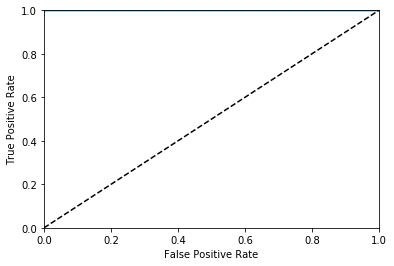

In [30]:
plot_roc_curve(fpr_dt, tpr_dt)
plt.show()

In [31]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.9999990093641874

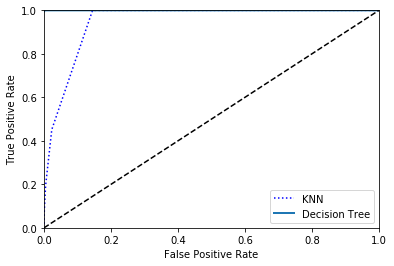

In [33]:
plt.plot(fpr_knn, tpr_knn, "b:", label="KNN")
plot_roc_curve(fpr_dt, tpr_dt, "Decision Tree")
plt.legend(loc="lower right")
plt.show()

### Performance on Test set